# **Graphs - BFS**

Like with trees, in many graph problems, it doesn't really matter if you use DFS or BFS, and there are rarely scenarios where DFS performs better than BFS - people just choose DFS because it's faster/cleaner to implement, especially recursively. Every problem we looked at in the previous example could be solved with a BFS.

But, there are some problems where using BFS is clearly better than using DFS. In trees, this was the case when we were concerned with tree levels. In graphs, it is mostly the case when you are asked to find the **shortest path**.

Recall that in binary trees, BFS would visit all nodes at a depth d before visiting any node at a depth d + 1. BFS visited the nodes according to their distance from the root.

99% of the time, a graph will not have a tree structure. But even then, the same logic still applies. Imagine whatever node you start from as a "root". Then, the neighbors of the root represent the next level, and the neighbors of those nodes represent the level after that.

BFS on a graph always visits nodes according to their distance from the starting point. This is the key idea behind BFS on graphs - every time you visit a node, you must have reached it in the minimum steps possible from wherever you started your BFS

    The above statement was always the case on binary trees, even if you did a DFS, because there is only one possible path to any node from the root. In a graph, there could be many paths from a given starting point to any other node. Using BFS will ensure that out of all possible paths, you take the shortest one.

We implemented DFS primarily with recursion, which uses a stack under the hood. To implement BFS, we will use a queue (iteratively) instead.

Example 1: 1091. Shortest Path in Binary Matrix

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1. A clear path is a path from the top-left cell (0, 0) to the bottom-right cell (n - 1, n - 1) such that all visited cells are 0. You may move 8-directionally (up, down, left, right, or diagonally).

We can treat the matrix as a graph where each square is a node and all squares have up to 8 edges to adjacent squares (up to, because squares on the edges have less due to potential neighbors being out of bounds). There could be many paths on the matrix, but we want the shortest one. Remember: with traversals, we only want to visit each square at most once, not just for efficiency but also to avoid cycles. If we were to do a DFS, we might not find the shortest path. Take the following example:

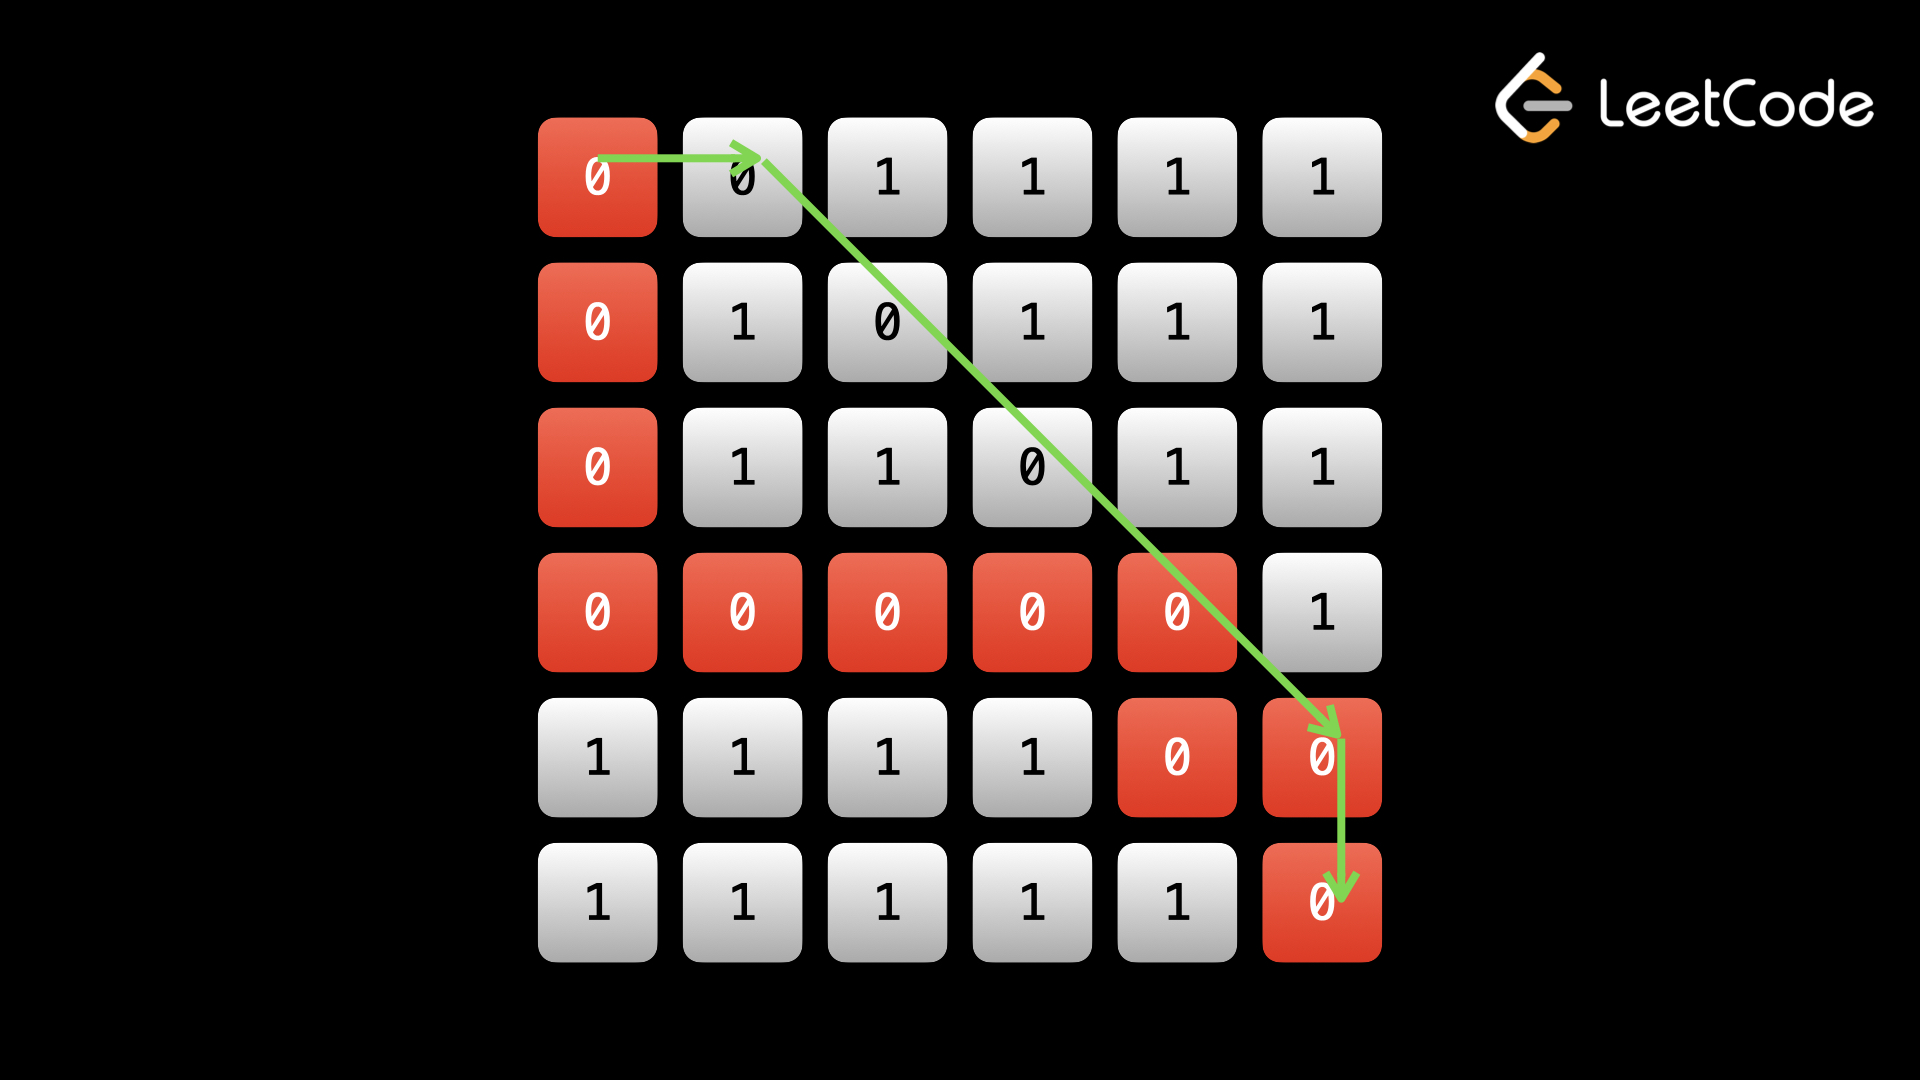

The path marked by the arrows is the optimal path (7 squares), and the red path is a path that might happen if you were to use DFS (11 squares). As you can see, the red path is longer and also "uses" up squares on the optimal path, and thus, this algorithm will not produce a correct answer. To find the shortest path, we should use BFS. With BFS, every time we visit a node, it is guaranteed that we reached it in the fewest steps possible. See the following example:

Remember when we looked at BFS on trees, and every iteration of the while loop represented a level/depth? Every time the animation above updates is like another "level" on the graph. Each level has the same distance from the start (0, 0) if you were to take the optimal path. With trees, we used a for loop inside of a while loop. This was because we cared about the levels as a whole - we wanted to analyze each level separately (find the maximum element, etc.). Here, we don't really care about the levels as a whole - we just want to reach the end (n - 1, n - 1). As such, we don't need the for loop, just the while loop on a queue. We can store the number of steps we have taken with each node, and once we reach the bottom right we know that we have the answer. Recall that this is because the first time we visit a node with BFS, we know we must have reached it with the minimum possible steps.

In [ ]:
from collections import deque

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        if grid[0][0] == 1:
            return -1
        
        def valid(row, col):
            return 0 <= row < n and 0 <= col < n and grid[row][col] == 0
        
        n = len(grid)
        seen = {(0, 0)}
        queue = deque([(0, 0, 1)]) # row, col, steps
        directions = [(0, 1), (1, 0), (1, 1), (-1, -1), (-1, 1), (1, -1), (0, -1), (-1, 0)]
        
        while queue:
            row, col, steps = queue.popleft()
            if (row, col) == (n - 1, n - 1):
                return steps
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    queue.append((next_row, next_col, steps + 1))
        
        return -1


    With an efficient queue, BFS has the same time and space complexity as DFS.

The steps taken to implement BFS are very similar to DFS. At each node, do some logic, then iterate over the neighbors (in this case, the 8 directions), check if the neighbor is in seen, and if it isn't, add it to seen and the queue. The main difference is that we are using a queue instead of a stack.

1926. Nearest Exit from Entrance in Maze

You are given an m x n matrix maze (0-indexed) with empty cells (represented as '.') and walls (represented as '+'). You are also given the entrance of the maze, where entrance = [entrancerow, entrancecol] denotes the row and column of the cell you are initially standing at.

In one step, you can move one cell up, down, left, or right. You cannot step into a cell with a wall, and you cannot step outside the maze. Your goal is to find the nearest exit from the entrance. An exit is defined as an empty cell that is at the border of the maze. The entrance does not count as an exit.

Return the number of steps in the shortest path from the entrance to the nearest exit, or -1 if no such path exists.

In [ ]:
    def nearestExit(self, maze, entrance):
        m = len(maze)
        n = len(maze[0])
        maze = [[1 if item == "+" else 0 for item in row] for row in maze]
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and maze[row][col] == 0
        exits = []
        for i in range(m):
            for j in range(n):
                if (i==0 or i == m-1 or j==0 or j == n-1) and maze[i][j] == 0:
                    exits.append((i, j))
        seen = {(entrance[0], entrance[1])}
        entrance = tuple(entrance)
        q = deque([(entrance[0], entrance[1], 0)])
        directions = [(0,1),(0,-1), (1,0), (-1,0)]
        while q:
            row, col, steps = q.popleft()
            if (row, col) in exits and (row, col) != entrance:
                return steps
            for dx, dy in directions:
                next_row, next_col = row + dx, col + dy 
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    q.append((next_row, next_col, steps + 1))
        return -1